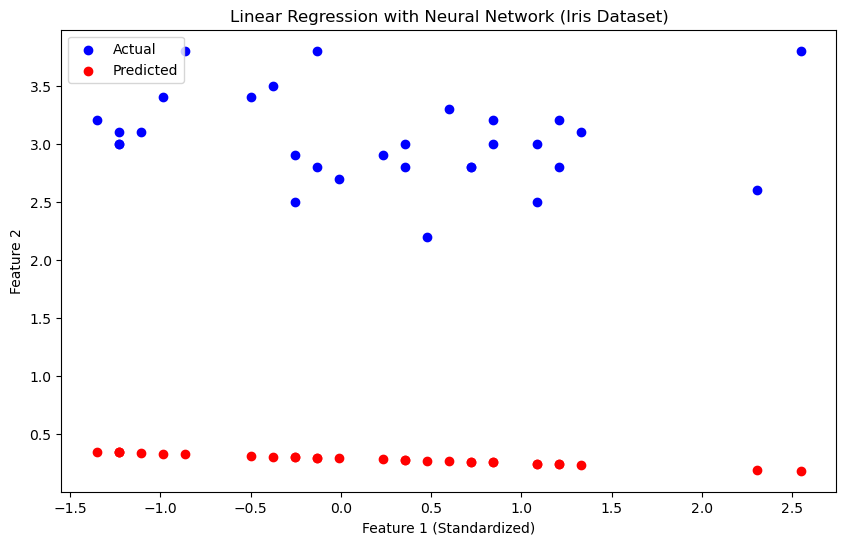

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()  # Load the Iris dataset
X = iris.data[:, :1]  # Use only the first feature for simplicity
y = iris.data[:, 1]   # Use the second feature as the target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # 80% training, 20% testing split

# Step 3: Standardize the features using StandardScaler
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)  # Transform the testing set

# Step 4: Create a simple neural network model for linear regression
input_layer = tf.keras.Input(shape=(1,))  # Define the input layer with 1 feature
output_layer = tf.keras.layers.Dense(units=1)(input_layer)  # Single neuron for regression
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)  # Define the model

# Step 5: Compile the model
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='mean_squared_error'  # Use mean squared error as the loss function
)

# Step 6: Train the model
history = model.fit(
    X_train, y_train, epochs=100, validation_split=0.2, verbose=0
)  # Train for 100 epochs with 20% validation split

# Step 7: Define a function for prediction to avoid retracing
@tf.function  # Use TensorFlow's @tf.function to optimize predictions
def predict(inputs):
    return model(inputs)  # Return predictions from the model

# Step 8: Predict the test set results
y_pred = predict(X_test).numpy()  # Predict and convert TensorFlow tensors to NumPy arrays

# Step 9: Plot the results
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Plot actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted')  # Plot predicted values
plt.title('Linear Regression with Neural Network (Iris Dataset)')  # Set the title
plt.xlabel('Feature 1 (Standardized)')  # Label for x-axis
plt.ylabel('Feature 2')  # Label for y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot

Epoch 1/100


C:\Users\Rampr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3467 - loss: 4.5164 - val_accuracy: 0.4667 - val_loss: 3.4155
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3467 - loss: 4.4729 - val_accuracy: 0.4667 - val_loss: 3.3759
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3269 - loss: 4.5529 - val_accuracy: 0.4667 - val_loss: 3.3361
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3081 - loss: 4.7380 - val_accuracy: 0.4667 - val_loss: 3.2963
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3571 - loss: 4.3811 - val_accuracy: 0.4667 - val_loss: 3.2568
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3217 - loss: 4.4557 - val_accuracy: 0.4667 - val_loss: 3.2172
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3113 - loss: 4.4806 - val_accuracy: 0.4667 - val_loss: 3.1776
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3113 - loss: 4.3833 - val_accuracy: 0.4667 - val_loss: 3.1382
Epoc

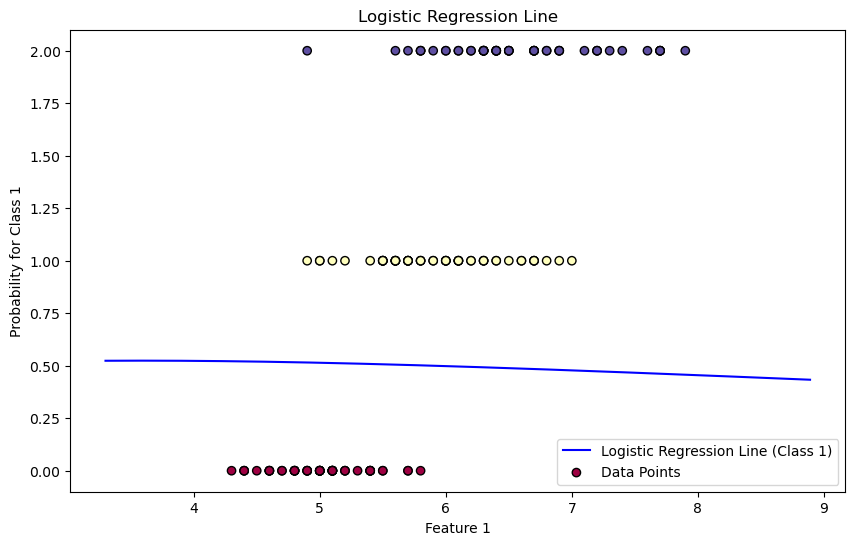

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Step 1: Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]        # Use only the first two features for simplicity
y = iris.target             # Target has three classes: 0, 1, 2

# Step 2: Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)  # Now: 80% train, 10% val, 10% test

# Step 3: Create a Logistic Regression model using Keras (Softmax for multi-class)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[2], activation='softmax')  # 3 output classes, 2 input features
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Suitable for integer class labels
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train, epochs=100,
    validation_data=(X_val, y_val)
)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Step 6: Plot the logistic regression line for class 1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.arange(x_min, x_max, 0.01)
# Predict probabilities for a grid where feature 2 is fixed at 0
probabilities = model.predict(np.c_[xx, np.zeros_like(xx)])
prob_class_1 = probabilities[:, 1]  # Probabilities for class 1

plt.figure(figsize=(10, 6))
plt.plot(xx, prob_class_1, label='Logistic Regression Line (Class 1)', color='blue')
plt.scatter(X[:, 0], y, c=y, cmap=plt.cm.Spectral, edgecolor='k', label='Data Points')
plt.title('Logistic Regression Line')
plt.xlabel('Feature 1')
plt.ylabel('Probability for Class 1')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\Rampr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3685 - loss: 1.2612 - val_accuracy: 0.2917 - val_loss: 1.1935
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3411 - loss: 1.2433 - val_accuracy: 0.2917 - val_loss: 1.1753
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3646 - loss: 1.2386 - val_accuracy: 0.2917 - val_loss: 1.1589
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3958 - loss: 1.1442 - val_accuracy: 0.2917 - val_loss: 1.1433
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3646 - loss: 1.2345 - val_accuracy: 0.2917 - val_loss: 1.1297
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3763 - loss: 1.1742 - val_accuracy: 0.2917 - val_loss: 1.1165
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3529 - loss: 1.1842 - val_accuracy: 0.2917 - val_loss: 1.1042
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3763 - loss: 1.1363 - val_accuracy: 0.2917 - val_loss: 1.0929
Epoc

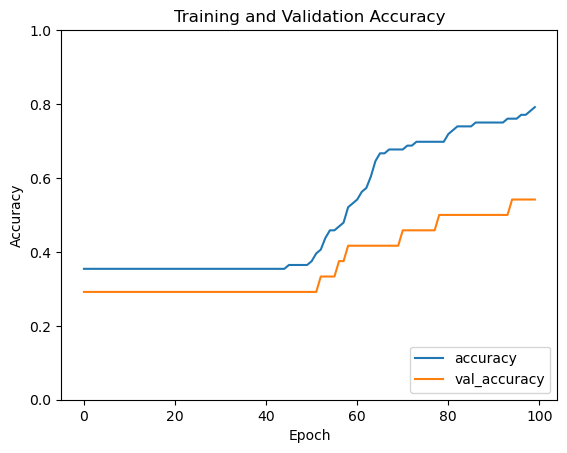

In [8]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data                       # All 4 features
y = iris.target.reshape(-1, 1)      # Reshape for encoder

# Step 2: One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Define the Perceptron model (1 hidden layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X.shape[1],)),  # Hidden layer with 10 neurons
    tf.keras.layers.Dense(3, activation='softmax')                            # Output layer for 3 classes
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Step 8: Make predictions
predictions = model.predict(X_test)
print('Predictions:')
print(predictions)

# Step 9: Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

Epoch 1/100


C:\Users\Rampr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4745 - mean_absolute_error: 2.2657 - val_loss: 5.6602 - val_mean_absolute_error: 1.8921
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8361 - mean_absolute_error: 1.7927 - val_loss: 3.8792 - val_mean_absolute_error: 1.5094
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6101 - mean_absolute_error: 1.4203 - val_loss: 2.7311 - val_mean_absolute_error: 1.2007
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3952 - mean_absolute_error: 1.1290 - val_loss: 1.9516 - val_mean_absolute_error: 0.9575
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7365 - mean_absolute_error: 0.9032 - val_loss: 1.4515 - val_mean_absolute_error: 0.7893
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2734 - mean_absolute_error: 0.7568 - val_loss: 1.1245 - val_mean_absolute_error: 0.6895
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0019 - mean_absolute_error: 0.6678 - val_lo

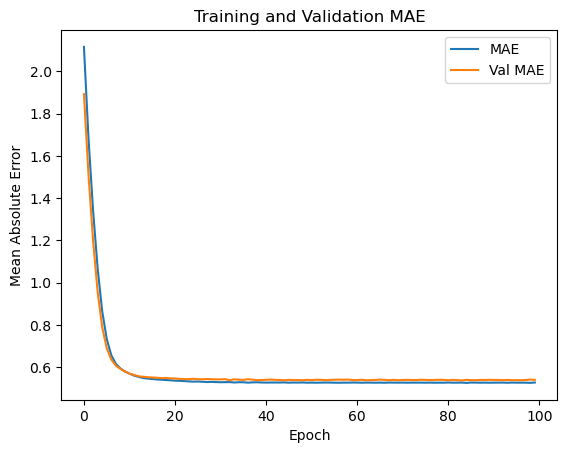

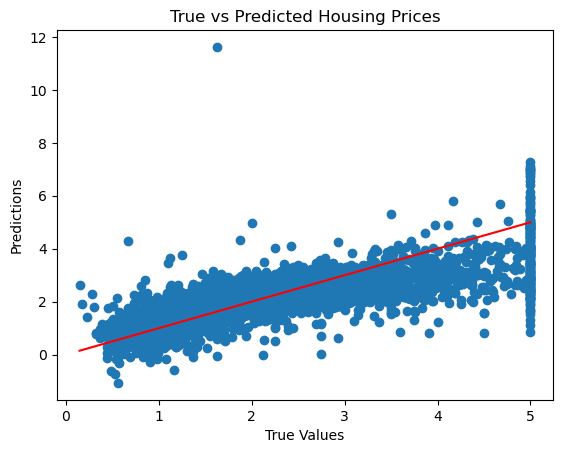

In [9]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the Perceptron model (single layer for regression)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X.shape[1],))
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Step 6: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Mean Absolute Error: {mae}')

# Step 8: Make predictions
predictions = model.predict(X_test)

# Step 9: Plot the training history (MAE per epoch)
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')
plt.show()

# Step 10: Plot true vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.title('True vs Predicted Housing Prices')
plt.show()

In [11]:
import tensorflow as tf
import numpy as np

# Step 1: Define the input data for XOR problem
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Step 2: Define the Feed-Forward Network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[2], activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Step 3: Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
model.fit(x, y, epochs=100)

# Step 5: Make predictions using the trained model
test_points = np.array([[1, 1], [0, 0]])   # <-- Use NumPy array here!
predictions = model.predict(test_points)
print(predictions)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 0.5000 - loss: 0.8217
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2500 - loss: 0.7274
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7240
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.7227
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6990
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6716
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6519
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.6498
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.2500 - loss: 0.6482
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2500 - loss: 0.6398
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6283
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - 

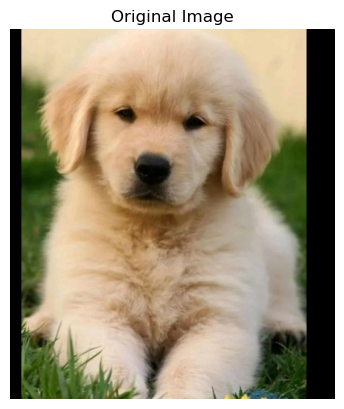

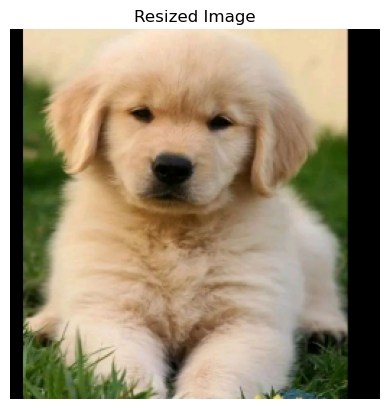

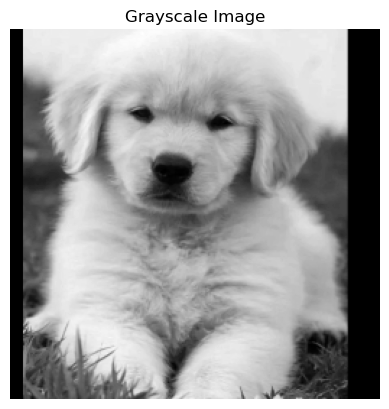

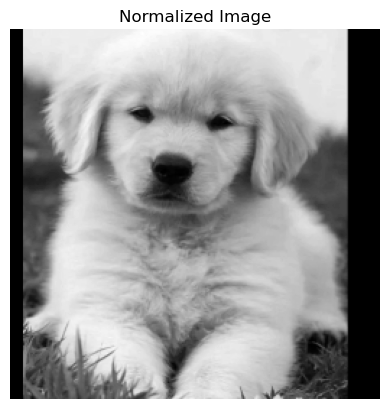

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import data 
# Step 1: Load the image from file
image_path = 'image.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)

# Step 2: Visualize the original image
plt.imshow(image.numpy())
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 3: Resize the image
image = tf.image.resize(image, size=(256, 256))

# Step 4: Visualize the resized image
plt.imshow(image.numpy().astype("uint8"))
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Step 5: Convert the image to grayscale
grayscale_image = tf.image.rgb_to_grayscale(image)

# Step 6: Visualize the grayscale image
plt.imshow(tf.squeeze(grayscale_image).numpy(), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Step 7: Normalize the pixel values of the image to [-1, 1]
normalized_image = (tf.cast(grayscale_image, tf.float32) - 127.5) / 127.5

# Step 8: Visualize the normalized image
plt.imshow(tf.squeeze(normalized_image).numpy(), cmap='gray')
plt.title('Normalized Image')
plt.axis('off')
plt.show()

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ex No: 5
# Date:
# Roll Number: 6178192211010624

# Load the MNIST dataset (handwritten digit images)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the training and test images to add a channel dimension (grayscale = 1 channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize pixel values to the range [0, 1] for better training performance
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Create a Sequential model to stack layers
model = Sequential()

# Add a 2D convolutional layer with 32 filters, 3x3 kernel, ReLU activation
# This layer extracts local features from the images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling layer to downsample the feature maps
model.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters for deeper feature extraction
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer for further downsampling
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps into a single vector for fully connected layers
model.add(Flatten())

# Add a Dense (fully connected) layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer: Dense layer with 10 neurons (one for each digit), softmax for probability output
model.add(Dense(10, activation='softmax'))

# Compile the model with sparse categorical crossentropy loss (for integer labels), Adam optimizer, and accuracy metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 5 epochs, and validate on the test set each epoch
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the trained model's performance on the test set and print the accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
Epoch 1/5


C:\Users\Rampr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9053 - loss: 0.3180 - val_accuracy: 0.9851 - val_loss: 0.0511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9881 - val_loss: 0.0356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9898 - val_loss: 0.0327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9896 - val_loss: 0.0308
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0409
Accuracy: 0.9896000027656555


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

# Ex No: 6
# Date:
# Roll Number: 6178192211010627, 6178192211010628, 6178192211010630

# Set parameters
num_classes = 3
IMAGE_SHAPE = [224, 224]
batch_size = 32   # You can adjust for your hardware/dataset
epochs = 5        # You can increase for better accuracy

# Load VGG16 base model (Transfer Learning)
vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False  # Freeze VGG16 layers

# Add custom layers on top of VGG16
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare directories
import os
os.makedirs('Train', exist_ok=True)
os.makedirs('Test', exist_ok=True)

# Download and extract dataset
import zipfile
import urllib.request

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_zip = "catsdogs.zip"

# Download only if not present
if not os.path.exists(dataset_zip):
    urllib.request.urlretrieve(dataset_url, dataset_zip)

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('./')

base_dir = './cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Use image_dataset_from_directory for data pipelines
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_set = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=32,
    image_size=(150, 150)
)
val_dataset = image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    batch_size=32,
    image_size=(150, 150)
)

# Data augmentation
from tensorflow import keras
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
])

# Visualize augmented images
for images, labels in training_set.take(1):
    plt.figure(figsize=(12, 12))
    first_image = images[0]
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0)
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")
    plt.show()

# Transfer Learning with Xception for binary classification
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()]
)

model.fit(training_set, epochs=20, validation_data=val_dataset)

# Fine-tune the model
base_model.trainable = True
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Setup callbacks for early stopping and TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_folder = 'logs'
callbacks = [
    EarlyStopping(patience=5),
    TensorBoard(log_dir=log_folder)
]

model.fit(training_set, epochs=15, validation_data=val_dataset, callbacks=callbacks)

In [15]:
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt  # Import matplotlib for display



# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Load the image
image = cv2.imread('water.jpg')

# Convert the image to a PyTorch tensor and normalize
image_tensor = torchvision.transforms.functional.to_tensor(image)

# Make a batch of the image tensor
image_batch = image_tensor.unsqueeze(0)

# Use the model to make predictions on the image batch
model.eval()
with torch.no_grad():
    predictions = model(image_batch)

# Get the bounding boxes, labels, and scores for the predictions
boxes = predictions[0]['boxes'].detach().numpy()
labels = predictions[0]['labels'].detach().numpy()
scores = predictions[0]['scores'].detach().numpy()

# Draw the bounding boxes on the image
for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:
        # Convert box coordinates to integers
        x1, y1, x2, y2 = box.astype(int)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            image, str(label), (x1, y1-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2
        )

# Display the annotated image using matplotlib
# Convert the image from BGR to RGB for correct display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

# Save the annotated image
cv2.imwrite('annotated_image.jpg', image)

ModuleNotFoundError: No module named 'torch'

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
# Load the dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Preprocess the data
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
maxlen=500)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=500)
# Define the model
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
metrics=['accuracy'])
# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=128)
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.6231 - loss: 0.6346
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.8383 - loss: 0.3895
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.8682 - loss: 0.3284
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.8889 - loss: 0.2813
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9062 - loss: 0.2451
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9220 - loss: 0.2035
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9373 - loss: 0.1716
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9525 - loss: 0.1399
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9653 - loss: 0.1038
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9758 - loss: 0.0731
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8384 - loss:

In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
# Load the dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
# Preprocess the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# Define the model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True,
validation_data=(X_test, X_test))
# Evaluate the model
decoded_imgs = autoencoder.predict(X_test)

Epoch 1/50


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)